<h5>01 - Import <code>OpenCV</code> And <code>matplotlib</code></h5>

In [30]:
import cv2 
import matplotlib.pyplot as plt

<h5>02 - Download Both <span style = 'color : #4CC190 ; '> Config File & Frozen Model </span> From <a href = 'https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API' >Here</a></h5>

<h5>03 - Config Them</h5>

In [14]:
frozenModule = 'config/frozen_inference_graph.pb'
configFile = 'config/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

<h5>04 - Create Your Model</h5>

In [24]:
model = cv2.dnn_DetectionModel(frozenModule , configFile)

<dnn_Model 0000021C7E6F8950>

<h5>05 - Set Up The Configuration</h5>

In [25]:
model.setInputSize(320 , 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5 , 127.5 , 127.5))
model.setInputSwapRB(True)

<dnn_Model 0000021C7E7CF030>

<h5>06 - Get Coco Labels From <a href = 'https://github.com/pjreddie/darknet/blob/master/data/coco.names'>Here</a></h5>

<h5>07 - Add <code>labels.txt</code> File To The Project</h5>

In [26]:
classLabels = []
fileName = 'data/labels.txt'
with open(fileName , 'rt') as fpt : 
    classLabels = fpt.read().rstrip('\n').split('\n')

<center>
    <h4>Ways To Read An Image</h4>
</center>

<h5>- First Way</h5>
<code>
variableName = cv2.imread(imagePath.fileFormat)
<br>
plt.imshow(variableName)
</code>

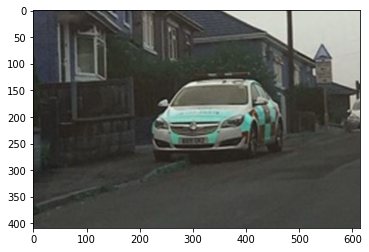

In [27]:
img = cv2.imread('images/carImage.png')
plt.imshow(img)

<p>The problem with that is it's BGR coloring system and we must convert it RGB</p>


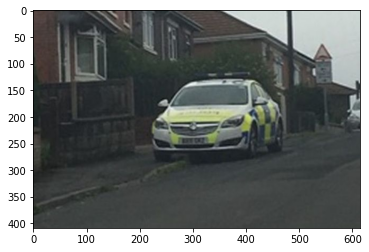

In [28]:
# This Will Fix It
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

<h5> 08 - Get <code> ClassIndex , confidence & bbox </code> from <code> model.detect(imagePath.fileFormat , confThreshold = percentileOfAccuracy) </code> </h5>

In [35]:
ClassIndex , confidence , bbox = model.detect(img , confThreshold = 0.7)

<h5>09 - Modify The Image</h5>

In [38]:
fontScale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd , conf , boxes in zip (ClassIndex.flatten() , confidence.flatten() , bbox) : 
    cv2.rectangle(img , boxes ,(255 , 0 , 0) , 2)
    cv2.putText(img , classLabels[ClassInd-1] , (boxes[0] + 10 , boxes[1] + 40) , font , fontScale = fontScale , color = (0 , 255 , 0) , thickness = 3)


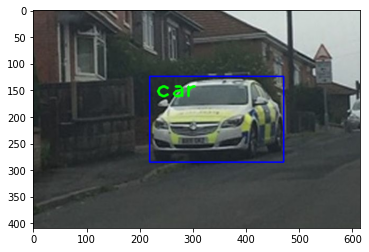

In [39]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))